In [1]:
from itertools import islice

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
from sklearn.manifold import TSNE

In [6]:
from gluonts.dataset.repository.datasets import get_dataset
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.torch.distributions import NegativeBinomialOutput

from pytorch_lightning.loggers import CSVLogger

from vq_ar import VQVAEEstimator, ImplicitQuantileNetworkOutput, QuantileLoss

2022-11-13 14:48:20.244805: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_4547/1412195018.py:7 in <module>                                                  │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_4547/1412195018.py'                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'vq_ar'

In [ ]:
dataset = get_dataset("solar-energy")

In [8]:
estimator = VQVAEEstimator(
        freq=dataset.metadata.freq,
        prediction_length=dataset.metadata.prediction_length,
        context_length=dataset.metadata.prediction_length*6,
        vq_embedding_dim=64,
        vq_num_embedding=128,
        vq_jitter_prob=None,
        scaling=True,
        num_feat_static_cat=len(dataset.metadata.feat_static_cat),
        cardinality=[int(cat_feat_info.cardinality) for cat_feat_info in dataset.metadata.feat_static_cat],
        embedding_dimension=[4],
        distr_output=ImplicitQuantileNetworkOutput("positive"),
        loss=QuantileLoss(),
        batch_size=256,
        num_batches_per_epoch=200,
        trainer_kwargs=dict(gpus="1", max_epochs=39, logger=CSVLogger(".", "lightning_logs/")),
    )

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_4547/1836648328.py:1 in <module>                                                  │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_4547/1836648328.py'                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'VQVAEEstimator' is not defined

In [7]:
predictor = estimator.train(
        training_data=dataset.train,
        validation_data=dataset.test,
        shuffle_buffer_length=1024,
        num_workers=8,
        cache_data=True,
)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /tmp/ipykernel_4547/3317728258.py:1 in <module>                                                  │
│                                                                                                  │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_4547/3317728258.py'                         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'estimator' is not defined

In [6]:
predictor = estimator.train(
        training_data=dataset.train,
        validation_data=dataset.test,
        shuffle_buffer_length=1024,
        num_workers=8,
        ckpt_path="./lightning_logs/version_150/checkpoints/epoch=38-step=7799.ckpt",
    )

/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
GPU available: True, used: True
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
TPU available: False, using: 0 TPU cores
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:324: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
IPU available: False, using: 0 IPUs
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:324: FutureWarning: Times

/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:326: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:325: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  return pd.Timestamp(
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._min_time_point, self._max_time_point, freq=start.freq


Validation sanity check: 0it [00:00, ?it/s]

/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:324: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:326: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:325: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  return pd.Timestamp(
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/sr

/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/transform/feature.py:352: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._min_time_point, self._max_time_point, freq=start.freq
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, of

In [7]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=predictor,
)

In [8]:
forecasts = list(forecast_it)

/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:321: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(string, freq=freq)
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:324: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:326: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/kashif/gluon-ts-PR/src/gluonts/dataset/common.py:325: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  return pd.Timestamp(
/home/kashif/gluon-ts-PR/src/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/kashif/gluon-ts-PR/sr

In [9]:
tss = list(ts_it)

In [10]:
evaluator = Evaluator()

In [11]:
agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts))

Running evaluation: 959it [00:00, 3417.75it/s]/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  date_before_forecast = forecast.index[0] - forecast.index[0].freq
/home/kashif/gluon-ts-PR/src/gluonts/evaluation/_base.py:306: FutureWarning: Timestamp.freq is

In [14]:
agg_metrics #iqn

{'MSE': 744.2577833047873,
 'abs_error': 294044.4634361267,
 'abs_target_sum': 708873.5020904541,
 'abs_target_mean': 30.799161543728452,
 'seasonal_error': 13.175128459742648,
 'MASE': 0.9693322013191428,
 'MAPE': 2.513198946954487,
 'sMAPE': 1.3462384516968262,
 'MSIS': 5.649469537724113,
 'QuantileLoss[0.1]': 132792.15914383356,
 'Coverage[0.1]': 0.1032325338894682,
 'QuantileLoss[0.2]': 214988.28419089556,
 'Coverage[0.2]': 0.16323427181091413,
 'QuantileLoss[0.3]': 264689.0169228413,
 'Coverage[0.3]': 0.29123218630517894,
 'QuantileLoss[0.4]': 289631.1344808319,
 'Coverage[0.4]': 0.5417970107751129,
 'QuantileLoss[0.5]': 294044.46376269485,
 'Coverage[0.5]': 0.692996176572819,
 'QuantileLoss[0.6]': 280076.24169234675,
 'Coverage[0.6]': 0.7504344803614877,
 'QuantileLoss[0.7]': 248458.6488290545,
 'Coverage[0.7]': 0.8003128258602711,
 'QuantileLoss[0.8]': 197017.81643655623,
 'Coverage[0.8]': 0.849756690997567,
 'QuantileLoss[0.9]': 123920.48062997145,
 'Coverage[0.9]': 0.893899895

In [13]:
agg_metrics #student-t

{'MSE': 1073.1727541703751,
 'abs_error': 377359.9692687988,
 'abs_target_sum': 708873.5020904541,
 'abs_target_mean': 30.799161543728452,
 'seasonal_error': 13.175128459742648,
 'MASE': 1.249429418100303,
 'MAPE': 2.42498906342517,
 'sMAPE': 1.3939888561853402,
 'MSIS': 13.250954085421224,
 'QuantileLoss[0.1]': 142895.82482513777,
 'Coverage[0.1]': 0.09575947167188043,
 'QuantileLoss[0.2]': 243759.35858631897,
 'Coverage[0.2]': 0.14633298574904416,
 'QuantileLoss[0.3]': 311330.1280863134,
 'Coverage[0.3]': 0.17179353493222108,
 'QuantileLoss[0.4]': 353986.7090053654,
 'Coverage[0.4]': 0.18965067778936393,
 'QuantileLoss[0.5]': 377359.96978248406,
 'Coverage[0.5]': 0.2679005908932916,
 'QuantileLoss[0.6]': 383820.75895680184,
 'Coverage[0.6]': 0.5899808828640946,
 'QuantileLoss[0.7]': 372105.1317129447,
 'Coverage[0.7]': 0.7645985401459854,
 'QuantileLoss[0.8]': 339700.9663562434,
 'Coverage[0.8]': 0.7891032325338895,
 'QuantileLoss[0.9]': 274927.71503842645,
 'Coverage[0.9]': 0.816127

In [12]:
agg_metrics #iqn + noise std * 0.2

{'MSE': 1034.691155060406,
 'abs_error': 345403.93288230896,
 'abs_target_sum': 708873.5020904541,
 'abs_target_mean': 30.799161543728452,
 'seasonal_error': 13.175128459742648,
 'MASE': 1.1441048309253308,
 'MAPE': 3.944208521755491,
 'sMAPE': 1.36283697061005,
 'MSIS': 8.951619029535973,
 'QuantileLoss[0.1]': 220286.72047582112,
 'Coverage[0.1]': 0.15941084462982275,
 'QuantileLoss[0.2]': 305235.88056749105,
 'Coverage[0.2]': 0.22536496350364962,
 'QuantileLoss[0.3]': 344978.94113816816,
 'Coverage[0.3]': 0.3587069864442127,
 'QuantileLoss[0.4]': 355953.2409140818,
 'Coverage[0.4]': 0.6381213069169274,
 'QuantileLoss[0.5]': 345403.9330512569,
 'Coverage[0.5]': 0.7888859923531456,
 'QuantileLoss[0.6]': 314036.4513233688,
 'Coverage[0.6]': 0.828945081682308,
 'QuantileLoss[0.7]': 267219.2288020846,
 'Coverage[0.7]': 0.8614007646854361,
 'QuantileLoss[0.8]': 203975.96020010448,
 'Coverage[0.8]': 0.8927702467848454,
 'QuantileLoss[0.9]': 123012.22303433818,
 'Coverage[0.9]': 0.9234445603

In [12]:
agg_metrics #iqn + noise std * 0.4

{'MSE': 1409.2782871135623,
 'abs_error': 403971.28554725647,
 'abs_target_sum': 708873.5020904541,
 'abs_target_mean': 30.799161543728452,
 'seasonal_error': 13.175128459742648,
 'MASE': 1.340304191961312,
 'MAPE': 4.892541199552219,
 'sMAPE': 1.384569410278208,
 'MSIS': 12.769089036371259,
 'QuantileLoss[0.1]': 304670.69616760616,
 'Coverage[0.1]': 0.1979058046576295,
 'QuantileLoss[0.2]': 392242.323933166,
 'Coverage[0.2]': 0.2733750434480361,
 'QuantileLoss[0.3]': 426204.4976127006,
 'Coverage[0.3]': 0.4135384080639555,
 'QuantileLoss[0.4]': 427198.7152014397,
 'Coverage[0.4]': 0.6939085853319429,
 'QuantileLoss[0.5]': 403971.28504819446,
 'Coverage[0.5]': 0.8347236704900939,
 'QuantileLoss[0.6]': 359894.0166751081,
 'Coverage[0.6]': 0.8710462287104622,
 'QuantileLoss[0.7]': 301706.9872412428,
 'Coverage[0.7]': 0.8942909280500522,
 'QuantileLoss[0.8]': 227247.50358671654,
 'Coverage[0.8]': 0.9138859923531457,
 'QuantileLoss[0.9]': 136074.0517126856,
 'Coverage[0.9]': 0.934045881126

In [12]:
agg_metrics #iqn + noise std * 0.6

{'MSE': 1732.200050951169,
 'abs_error': 467905.72048950195,
 'abs_target_sum': 708873.5020904541,
 'abs_target_mean': 30.799161543728452,
 'seasonal_error': 13.175128459742648,
 'MASE': 1.5648877272509893,
 'MAPE': 5.888383376879365,
 'sMAPE': 1.4100008849514247,
 'MSIS': 15.25381156060887,
 'QuantileLoss[0.1]': 361999.9466413066,
 'Coverage[0.1]': 0.23062217587765035,
 'QuantileLoss[0.2]': 463350.1093889219,
 'Coverage[0.2]': 0.32077685088633995,
 'QuantileLoss[0.3]': 500143.07601553935,
 'Coverage[0.3]': 0.45828988529718456,
 'QuantileLoss[0.4]': 497941.4304164464,
 'Coverage[0.4]': 0.7361400764685435,
 'QuantileLoss[0.5]': 467905.7209992605,
 'Coverage[0.5]': 0.8520594369134515,
 'QuantileLoss[0.6]': 413097.05544626334,
 'Coverage[0.6]': 0.8801703163017032,
 'QuantileLoss[0.7]': 342292.4896547234,
 'Coverage[0.7]': 0.8993309002433091,
 'QuantileLoss[0.8]': 253907.51449940115,
 'Coverage[0.8]': 0.9182307959680223,
 'QuantileLoss[0.9]': 147170.41257548376,
 'Coverage[0.9]': 0.9354796

In [12]:
agg_metrics #iqn + noise std * 0.8

{'MSE': 2217.7353159460617,
 'abs_error': 538121.1433525085,
 'abs_target_sum': 708873.5020904541,
 'abs_target_mean': 30.799161543728452,
 'seasonal_error': 13.175128459742648,
 'MASE': 1.8010267436922869,
 'MAPE': 6.453627254127158,
 'sMAPE': 1.4299980746319942,
 'MSIS': 17.667437493055463,
 'QuantileLoss[0.1]': 431709.66571680363,
 'Coverage[0.1]': 0.25364963503649635,
 'QuantileLoss[0.2]': 545037.3213768754,
 'Coverage[0.2]': 0.35088633993743484,
 'QuantileLoss[0.3]': 584152.4808597093,
 'Coverage[0.3]': 0.4929614181438998,
 'QuantileLoss[0.4]': 577089.5439465774,
 'Coverage[0.4]': 0.7619482099409106,
 'QuantileLoss[0.5]': 538121.1429633496,
 'Coverage[0.5]': 0.8677007299270073,
 'QuantileLoss[0.6]': 471055.15814573714,
 'Coverage[0.6]': 0.894508168230796,
 'QuantileLoss[0.7]': 387235.14546507725,
 'Coverage[0.7]': 0.9139294403892945,
 'QuantileLoss[0.8]': 284285.64855953626,
 'Coverage[0.8]': 0.9310914146680571,
 'QuantileLoss[0.9]': 160749.37649861875,
 'Coverage[0.9]': 0.9461244

In [12]:
agg_metrics #iqn + noise std * 1.0

{'MSE': 2738.694574974625,
 'abs_error': 612497.0150814056,
 'abs_target_sum': 708873.5020904541,
 'abs_target_mean': 30.799161543728452,
 'seasonal_error': 13.175128459742648,
 'MASE': 2.0429285395358603,
 'MAPE': 7.378531279270315,
 'sMAPE': 1.4519607113349922,
 'MSIS': 21.184918055029186,
 'QuantileLoss[0.1]': 502883.24465133407,
 'Coverage[0.1]': 0.2851929092805005,
 'QuantileLoss[0.2]': 630137.338872993,
 'Coverage[0.2]': 0.38129996524157117,
 'QuantileLoss[0.3]': 670334.2123124321,
 'Coverage[0.3]': 0.5152502606882169,
 'QuantileLoss[0.4]': 659320.5477688096,
 'Coverage[0.4]': 0.7799356969064998,
 'QuantileLoss[0.5]': 612497.0158829764,
 'Coverage[0.5]': 0.8749131039277025,
 'QuantileLoss[0.6]': 534327.0553551852,
 'Coverage[0.6]': 0.9014598540145985,
 'QuantileLoss[0.7]': 437862.27515515,
 'Coverage[0.7]': 0.9187087243656588,
 'QuantileLoss[0.8]': 319981.7845665789,
 'Coverage[0.8]': 0.9341762252346194,
 'QuantileLoss[0.9]': 179789.95339253597,
 'Coverage[0.9]': 0.94790580465762

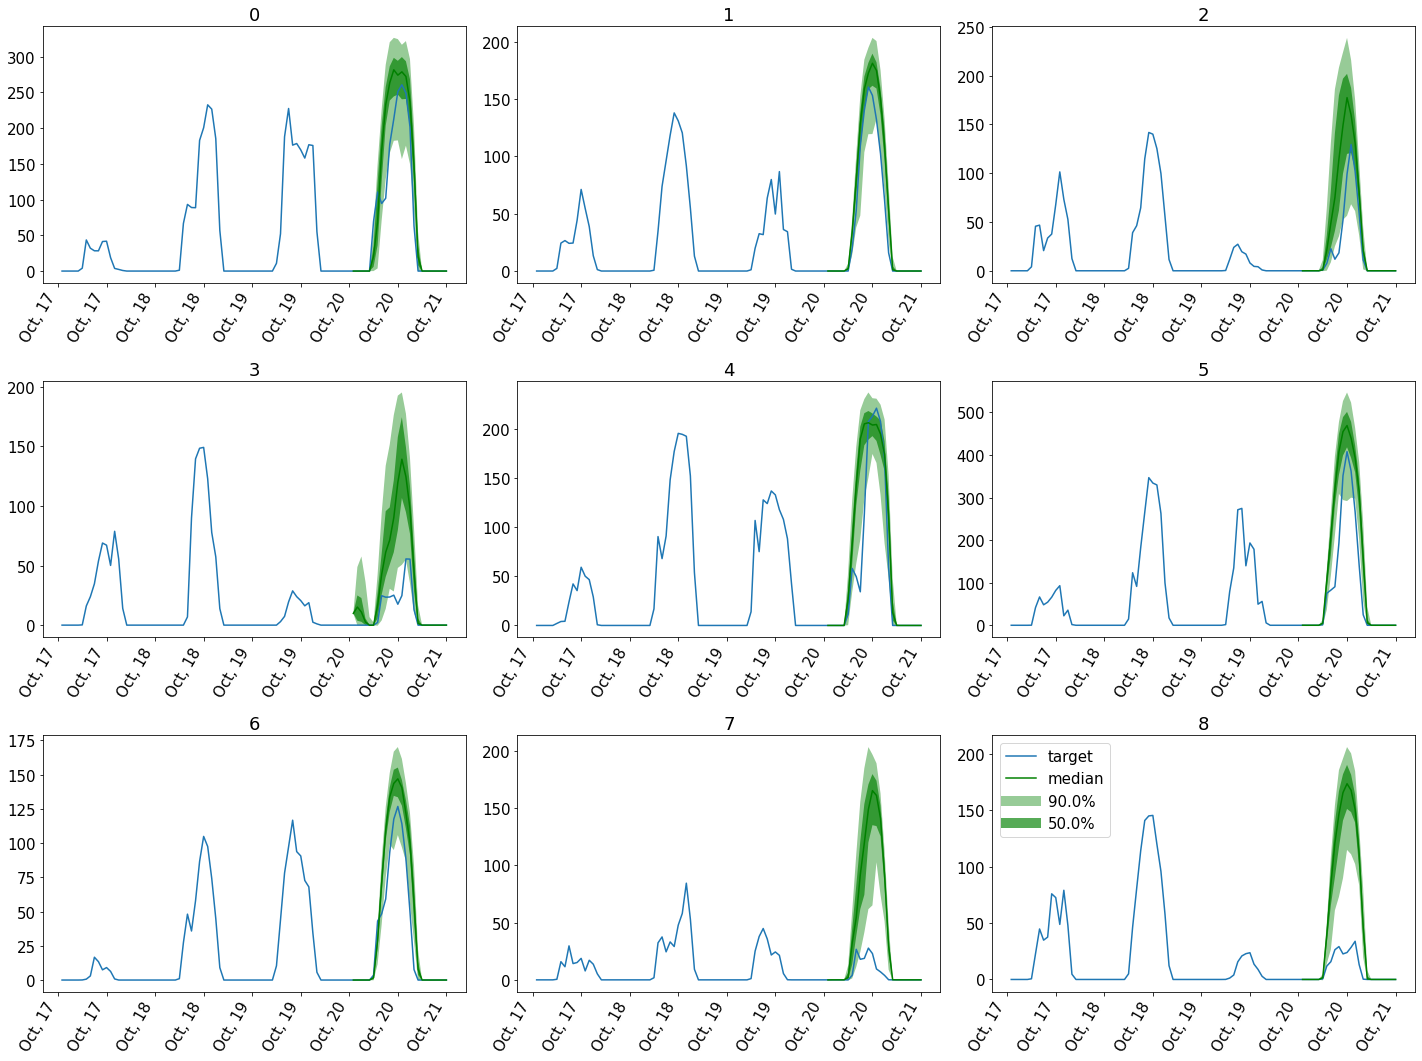

In [13]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter('%b, %d')
plt.rcParams.update({'font.size': 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx+1)

    plt.plot(ts[-4 * dataset.metadata.prediction_length:], label="target", )
    forecast.plot( color='g')
    plt.xticks(rotation=60)
    ax.xaxis.set_major_formatter(date_formater)
    ax.set_title(forecast.item_id)

plt.gcf().tight_layout()
plt.legend()
plt.show()

In [18]:
metrics = pd.read_csv("lightning_logs/version_86/metrics.csv")

In [19]:
metrics

,train_perplexity,epoch,step,val_loss,train_loss
0,2.042362,0,49,NaN,NaN
1,2.050069,0,99,NaN,NaN
2,2.743227,0,149,NaN,NaN
3,2.440984,0,199,NaN,NaN
4,NaN,0,199,4.355846,NaN
...,...,...,...,...,...
295,80.659866,49,9899,NaN,NaN
296,82.568138,49,9949,NaN,NaN
297,81.211136,49,9999,NaN,NaN
298,NaN,49,9999,1.084462,NaN


Text(0, 0.5, 'perplexity')

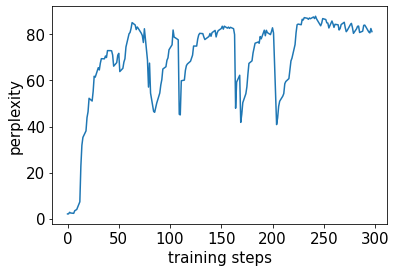

In [20]:
ax = metrics.train_perplexity.dropna().plot(kind="line")
ax.set_xlabel("training steps")
ax.set_ylabel("perplexity")

Text(0, 0.5, 'val neg. log likelihood')

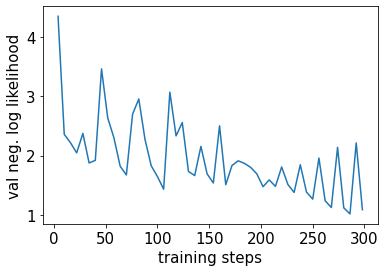

In [21]:
ax = metrics.val_loss.dropna().plot()
ax.set_xlabel("training steps")
ax.set_ylabel("val neg. log likelihood")

In [22]:
X = predictor.prediction_net.vq_vae.embed.cpu()

In [23]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(X)

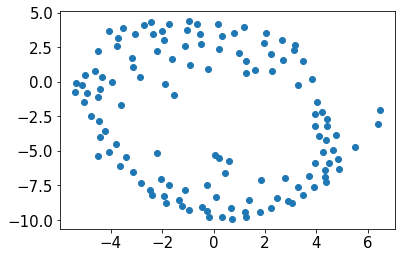

In [24]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], alpha=1.0)